### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
Data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
print('Info')
Data.info()

print('Shape')
Data.shape

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Shape


(100000, 4)

**Observations:** 4 columns, 100,000 rows, non null values for the 'Data' dataset.

In [4]:
print('Data description')
Data.describe()



Data description


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


**Insight:** The rating column has median greater than mean, so it is negatively skewed

In [7]:
print('Item')
item.info()
print('\n')
print('Shape')
item.shape


Item
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  T

(1681, 22)

**Observation:** 1681 rows, 22 columns and non-null values for 'item' Dataset

In [8]:
print('Data description')
item.describe()

Data description


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print('User')
user.info()
print('\n')
print('Shape')
user.shape


User
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


Shape


(943, 5)

**Observation:** 943 rows, 5 columns, non null values for 'user' Dataset

In [10]:
print('Data description')
user.describe()

Data description


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


**Insights:** As Mean age is greater than Median age, the age column is positively skewed

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [11]:
item.loc[:,'unknown':'Western'].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Insights:** As we can see above results, Drama has maximum number of movies (725) unknown has minimum movies (1)

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [12]:
np.where(item["unknown"] == 1)

(array([1371], dtype=int64),)

In [13]:
item.iloc[[1371]]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
item_2 = item.drop(index = 1371)
item_2.shape

(1680, 22)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [15]:
column_list = list(item_2)

del column_list[0:3]

item_2["Number of Genres"] = item_2[column_list].sum(axis=1)

df_movies = item_2[["movie title", "Number of Genres"]]

df_movies = df_movies[df_movies['Number of Genres'] > 1]

df_movies.head()

,movie title,Number of Genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2


In [73]:
df_movies['movie title'].count()

849

**Insights:** The total Number of movies which has more than 1 genres are 849

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


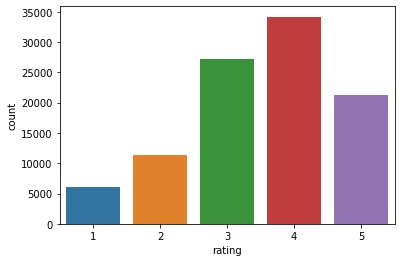

In [4]:
sns.countplot(Data['rating'])

C:\Users\saura\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


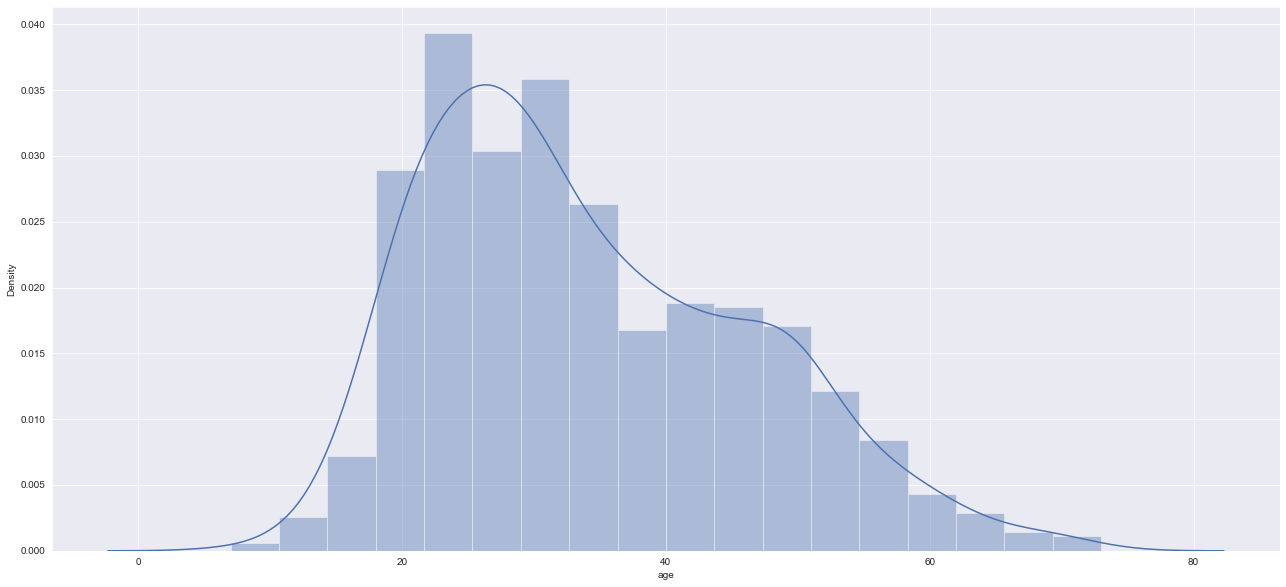

In [12]:
sns.distplot(user['age'])

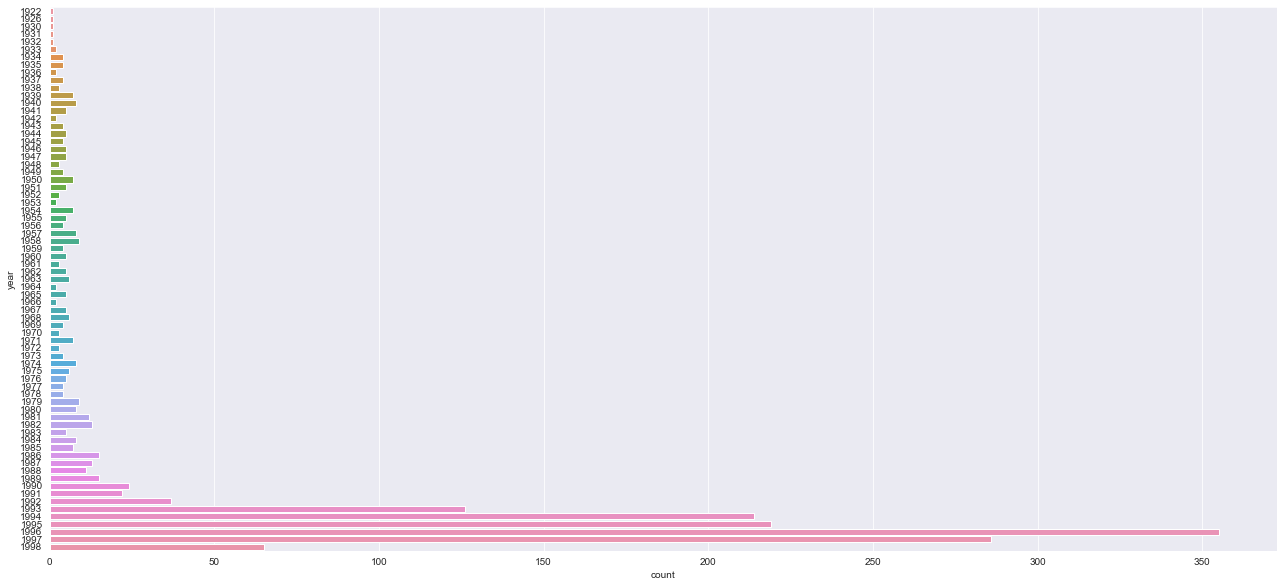

In [20]:
item_1 = item.copy()
item_1['year'] = pd.DatetimeIndex(item_1['release date']).year
sns.countplot(y = 'year', data = item_1)

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


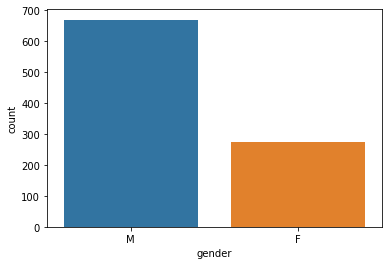

In [5]:
sns.countplot(user['gender'])

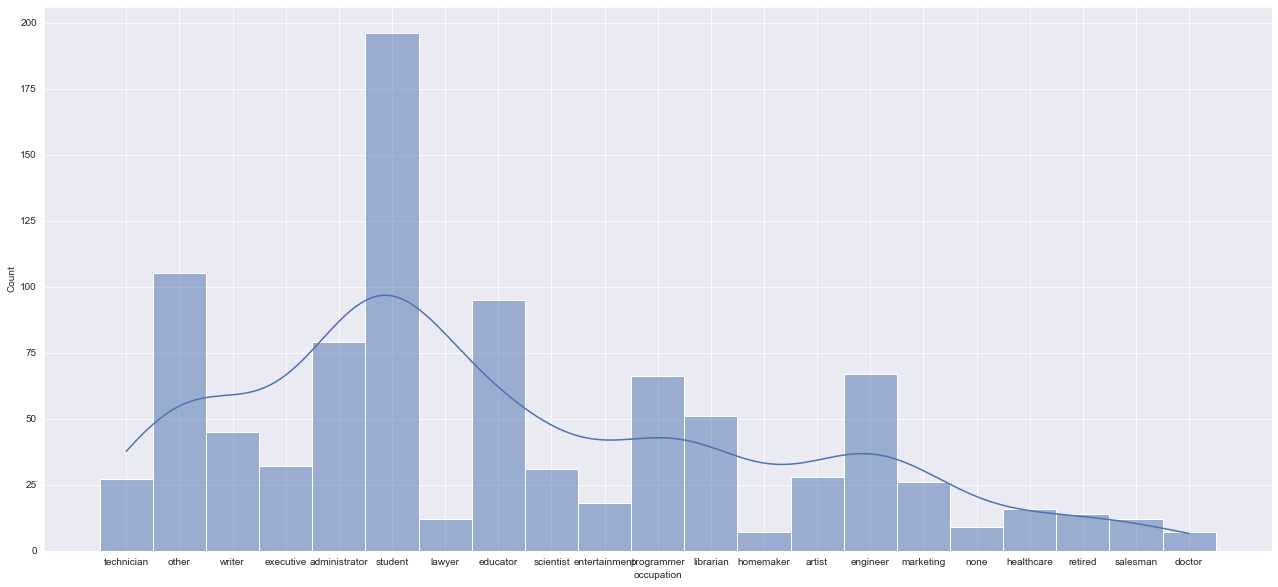

In [11]:
sns.set({'figure.figsize': (22,10)})
sns.histplot(user['occupation'], kde = True)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [17]:
item_new = item.copy()
import datetime

In [18]:
item_new['year'] = pd.DatetimeIndex(item_new['release date']).year

In [19]:
item_new.drop(['movie id', 'movie title', 'release date'], axis =1 , inplace =True)

In [20]:
item_new = item_new.groupby(['year']).sum()
item_new["total"] = item_new.sum(axis=1)

In [21]:
item_new = (item_new.div(item_new['total'], axis= 0) * 100)

In [22]:
item_new.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100.0
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100.0
1931,0.0,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,0.0,0.0,33.333333,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,0.0,100.0
1932,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,0.000000,50.0,0.0,100.0


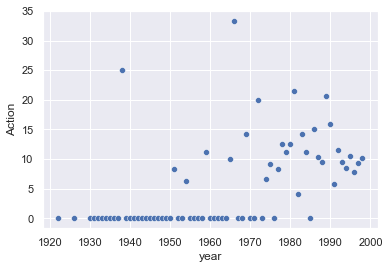

In [23]:
sns.set(color_codes=True) 
%matplotlib inline 
sns.scatterplot(x = 'year', y = 'Action', data = item_new);

**INSIGHTS:** Maximum number of Action films were produced around 1965 which is 35%, but Action films has been consistent primarily after 1970s, before 1970 there were very few Action films produced.

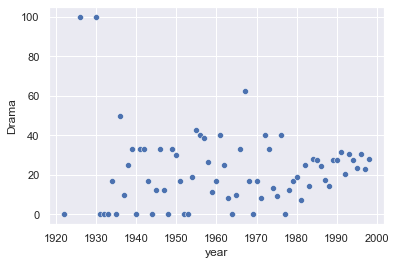

In [24]:
sns.scatterplot(x = 'year', y = 'Drama', data = item_new);

**INSIGHTS:** Almost 100 % films which were produced approximately during 1925 and 1930 were Drama. The percentage of drama films produced has steadily increased from 1980 to 1990. 

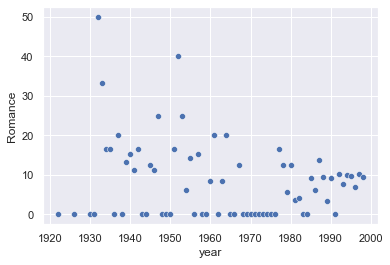

In [25]:
sns.scatterplot(x = 'year', y = 'Romance', data = item_new);

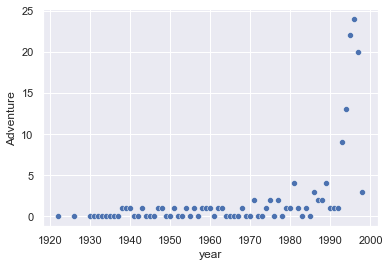

In [23]:
sns.scatterplot(x = 'year', y = 'Adventure', data = item_new);

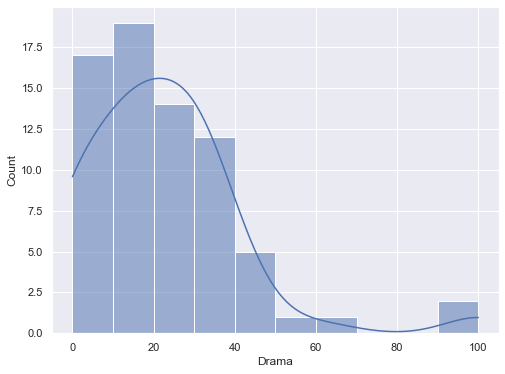

In [75]:
sns.set({'figure.figsize': (8,6)})
sns.histplot(item_new['Drama'], kde=True);

**Insights:** As we can see from above histogram, maximum times around 15-20 % of total films produced are Drama films. 



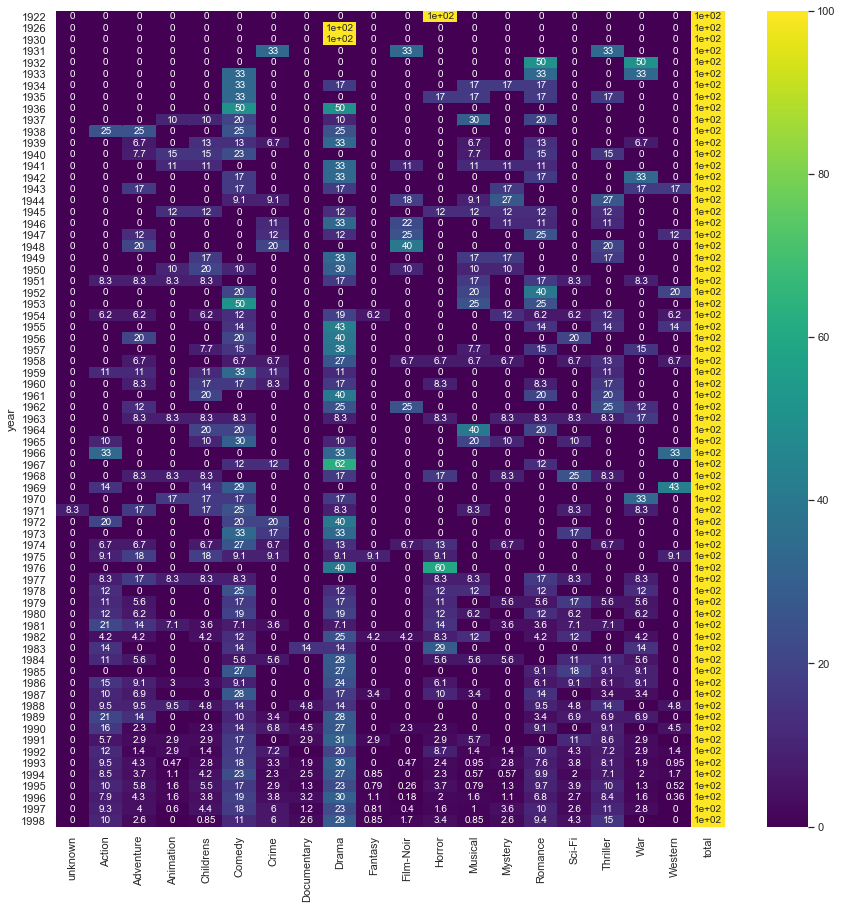

In [99]:
plt.figure(figsize=(15, 15))
sns.heatmap(item_new,cmap = 'viridis',annot=True)
plt.show()

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [27]:
rating = pd.read_csv('Data.csv')
rating  = rating.sort_values('rating')

In [28]:
rating =  rating.groupby('movie id', as_index=False)['rating'].mean()

In [29]:
rating.columns = ['movie id', 'average_rating']
rating.head()

,movie id,average_rating
0,1,3.878319
1,2,3.206107
2,3,3.033333
3,4,3.550239
4,5,3.302326


In [30]:
count = pd.read_csv('Data.csv')
count = count.sort_values('rating')

In [31]:
count =  count.groupby('movie id', as_index=False)['rating'].count()

In [32]:
count.columns = ['movie id', 'rating_count']
count.head()

,movie id,rating_count
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86


In [33]:
movie_title = item.iloc[:,0:2]

In [34]:
df1 = pd.merge(movie_title, count)

In [43]:
movie_lens = pd.merge(df1, rating)
movie_lens.head()

,movie id,movie title,rating_count,average_rating
0,1,Toy Story,452,3.878319
1,2,GoldenEye,131,3.206107
2,3,Four Rooms,90,3.033333
3,4,Get Shorty,209,3.550239
4,5,Copycat,86,3.302326


In [36]:
movie_highrate = movie_lens.loc[movie_lens['rating_count'] > 100] 

In [37]:
movie_result = movie_highrate.sort_values('average_rating', ascending = False)

In [38]:
movie_result[:25]

,movie id,movie title,rating_count,average_rating
406,408,"Close Shave, A",112,4.491071
316,318,Schindler's List,298,4.466443
168,169,"Wrong Trousers, The",118,4.466102
481,483,Casablanca,243,4.456790
63,64,"Shawshank Redemption, The",283,4.445230
601,603,Rear Window,209,4.387560
11,12,"Usual Suspects, The",267,4.385768
49,50,Star Wars,583,4.358491
177,178,12 Angry Men,125,4.344000
133,134,Citizen Kane,198,4.292929


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

Merge all the datasets

There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

you might want ot use the .sum(), .div() function here.

Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [41]:
df2 = pd.merge(item, Data)
movie_merge = pd.merge(df2, user)

In [45]:
movie_merge.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,308,5,887736696,60,M,retired,95076


In [92]:
total_gender_count = movie_merge['gender'].value_counts()
total_gender_count.sort_values()

F    25738
M    74253
Name: gender, dtype: int64

In [94]:
moviedf1 = movie_merge[['Drama', 'rating', 'gender']]
moviedf1 = moviedf1.groupby('gender')['Drama'].sum()
moviedf1.div(total_gender_count, axis= 0) * 100

F    42.769446
M    38.903479
dtype: float64

**1.Insight: 42 % of total Women watches Drama While 38 % of Total Men watches Drama. Which Means Men DO NOT watch more Drama than Women**

In [96]:
moviedf2 = movie_merge[['Sci-Fi', 'rating', 'gender']]
moviedf2 = moviedf2.groupby('gender')['Sci-Fi'].sum()
moviedf2.div(total_gender_count, axis= 0) * 100

F    10.214469
M    13.603491
dtype: float64

**2.Insight: 13 % of total Men watches Sci-Fi while 10% of total Women watches Sci-Fi. Which means Women Do NOT watch more Sci-Fi than Men**

In [97]:
moviedf3 = movie_merge[['Romance', 'rating', 'gender']]
moviedf3 = moviedf3.groupby('gender')['Romance'].sum()
moviedf3.div(total_gender_count, axis= 0) * 100

F    22.760121
M    18.319799
dtype: float64

**3.Insight:22 % of total Women watches Romance while 18 % of total Men watches Romance. Which means Women watch more Romance than Men**